In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/Users/kyivnik/Desktop/PythonProject/twitter-airline-sentiment/Tweets.csv'

In [3]:
df = pd.read_csv(data_path, encoding='ISO-8859-1')

In [4]:
print(df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
print(df.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [8]:
import re
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyivnik/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def clean_text(text):
    # Перетворюємо текст до нижнього регістру
    text = text.lower()
    # Видаляємо посилання
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Видаляємо @mentions
    text = re.sub(r'@\w+', '', text)
    # Видаляємо символи, що не є літерами або цифрами
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Видаляємо зайві пробіли
    text = re.sub(r'\s+', ' ', text).strip()
    # Видаляємо стоп-слова (опціонально)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [11]:
df['clean_text'] = df['text'].apply(clean_text)

In [12]:
print(df[['text', 'clean_text']].head())

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                          clean_text  
0                                               said  
1      plus youve added commercials experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pandas as pd

In [15]:
df = pd.read_csv(data_path, encoding='ISO-8859-1')
print(df.head())
print(df.columns)

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Перетворення тексту до нижнього регістру
    text = text.lower()
    # Видалення посилань
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Видалення @mentions
    text = re.sub(r'@\w+', '', text)
    # Видалення небажаних символів (залишаємо лише літери та цифри)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Видалення зайвих пробілів
    text = re.sub(r'\s+', ' ', text).strip()
    # Видалення стоп-слів (опціонально)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Застосовуємо функцію до стовпця 'text' і створюємо новий стовпець 'clean_text'
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyivnik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Визначимо X – наші текстові дані, і y – мітки настроїв
X = df['clean_text']
y = df['airline_sentiment']  # змінити, якщо назва колонки інша

# Розділимо дані: 80% на тренування, 20% на тестування
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Створюємо об'єкт TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # можна коригувати max_features

# Навчаємо векторизатор на тренувальних даних і перетворюємо текст
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [21]:
# Створюємо модель логістичної регресії
model = LogisticRegression(max_iter=1000)  # збільшення кількості ітерацій для кращої збіжності

# Навчаємо модель на тренувальних даних
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Прогнозування міток на тестовій вибірці
y_pred = model.predict(X_test_tfidf)

# Оцінка ефективності моделі
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7978142076502732

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.67      0.46      0.55       580
    positive       0.82      0.62      0.71       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928


Confusion Matrix:
 [[1782   77   30]
 [ 280  269   31]
 [ 121   53  285]]


In [23]:
import joblib

# Збереження моделі
joblib.dump(model, "model.pkl")
# Збереження векторизатора
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

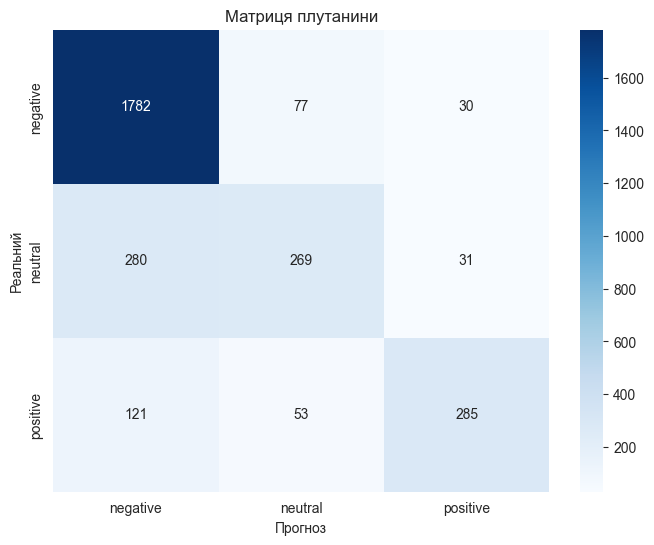

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Прогноз")
plt.ylabel("Реальний")
plt.title("Матриця плутанини")
plt.show()
